In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_mse(mse):
    mse = mse.reset_index(names=['sampler', 'm', 'seed'])
    m_list = mse['m'].unique()
    d = mse.shape[1] - 3
    sns.set_theme(context='paper', style='whitegrid', font_scale=1.5)
    fig, ax = plt.subplots(1, d, figsize=(2.5 * d, 2.5), sharey=True)
    for j in range(d):
        sns.pointplot(ax=ax[j], data=mse, x='m', y=j, hue='sampler', ls='', capsize=0.1, markers=['.', '*'], markersize=10)

        ax[j].set_ylabel('MSE')

        l1 = 1 / (2**m_list)
        l1 = l1 / l1[0] * mse.loc[(mse['sampler'] == 'mc') & (mse['m'] == m_list.min())][j].mean()
        l2 = 1 / (4**m_list)
        l2 = l2 / l2[0] * mse.loc[(mse['sampler'] == 'rqmc') & (mse['m'] == m_list.min())][j].mean()
        ax[j].plot(np.arange(len(m_list)), l1, ls='--', c='gray')
        ax[j].plot(np.arange(len(m_list)), l2, ls=':', c='gray')
        
        if j == 0:
            handles, labels = ax[j].get_legend_handles_labels()
            labels = ['MC', 'RQMC']
            ax[j].legend(handles, labels, title='', markerscale=1., fontsize=13)
            ax[j].annotate(r'$n^{-1}$', (len(m_list)-1.5, l1[-1]), fontsize=13)
            ax[j].annotate(r'$n^{-2}$', (len(m_list)-1.5, l2[-1]), fontsize=13)
        else:
            ax[j].legend().remove()
        ax[j].set_xticks(np.arange(len(m_list)))
        ax[j].set_xticklabels([r"$2^{{{:.0f}}}$".format(m) for m in m_list])
        ax[j].set_xlabel('Sample size', fontsize=12)

    plt.yscale('log', base=2)
    plt.tight_layout()

In [3]:
posterior_name = 'hmm'
with open (f"experiments/results/{posterior_name}_mcmc_moments.pkl", "rb") as f:
    reference_moments = pickle.load(f)

with open(f"experiments/results/{posterior_name}_comp_3.pkl", "rb") as f:
    tqmc_moments = pickle.load(f)

ref_moment_1 = reference_moments['moments_1'].mean(0)
ref_moment_2 = reference_moments['moments_2'].mean(0)

mse_1 = (pd.DataFrame(tqmc_moments['moment1']).T - ref_moment_1)**2
mse_2 = (pd.DataFrame(tqmc_moments['moment2']).T - ref_moment_2)**2

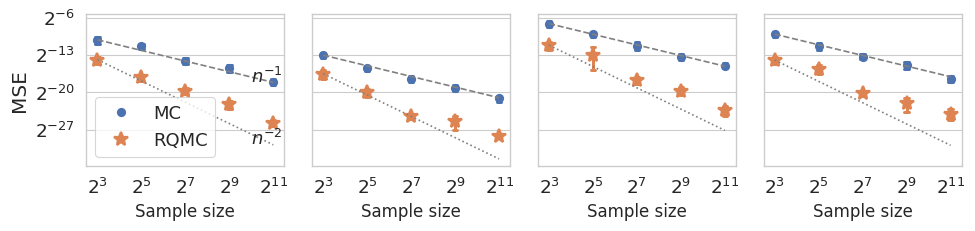

In [4]:
plot_mse(mse_1)

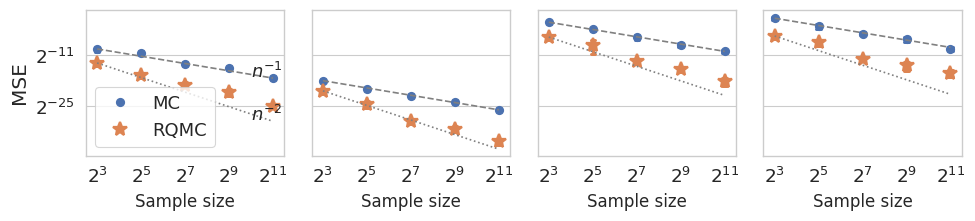

In [5]:
plot_mse(mse_2)